## Content

1. 필요한 데이터
 - 휴게소 데이터
 - 졸음쉼터 데이터


2. 시각화(using Folium)
 - 휴게소 데이터 시각화
 - 졸음쉼터 데이터 시각화
 - 휴게소 및 졸음쉼터 데이터 시각화


3. 2019 명절 고속도로 톨게이트 입출구 교통량 데이터
 - 데이터셋 이해(테이블, 컬럼, 코드 정의 파악)
 - 필요한 데이터만 추출, 전처리
 - 영업소 데이터 시각화
 - 휴게소, 졸음쉼터, 영업소 데이터 하나의 지도에 시각화
 - 설 전날 및 설 당일(2019.02.04 ~ 2019.02.05) 
 - 추석 전날 및 추석 당일(2019.09.12 ~ 2019.09.13)

In [1]:
# !pip install folium

In [2]:
# 디렉토리 지정
import os 

# 기본 라이브러리
import pandas as pd 
import numpy as np
from datetime import * 
import math

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 지도 시각화를 위한 라이브러리
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

In [3]:
# 폰트 설정
import matplotlib.pyplot as plt

# matplotlib 폰트설정
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


In [4]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 1. 필요한 데이터

## 1-1. 휴게소 데이터

교통량이 가장 많은 경부선만 고려한다. 또한 명절 당일과 이전 날을 고려하는 만큼, 서울에서 지방으로의 이동이 더 많을 거라고 생각해 경부선 휴게소 중에서도 부산방향 휴게소만을 고려한다. 

- 경부고속도로(京釜高速道路, 고속국도 제1호선)는 부산광역시 금정구를 기점으로, 서울특별시 서초구를 종점으로 하는 대한민국의 고속도로이다. 또한 대한민국 최장거리의 고속도로이기도 하며 아시안 하이웨이 1호선의 일부를 이룬다.
- 위 설명의 출처: 
https://ko.wikipedia.org/wiki/%EA%B2%BD%EB%B6%80%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C

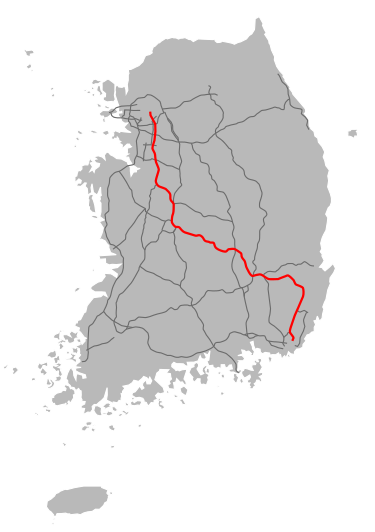

In [5]:
servicearea_info = pd.read_csv('C:/Users/jilon/Desktop/rest.csv') 
print(type(servicearea_info))

<class 'pandas.core.frame.DataFrame'>


In [6]:
servicearea_info

,휴게소명,전화번호,편의시설,브랜드매장,경정비소,화물 휴게소,대표음식,위도,경도,주소
0,서울만남(부산 방향),02-578-3372,"수유실, 수면실, , ,",탐엔탐스외 5,X,X,말죽거리소고기국밥,37.460226,127.041889,서울특별시 서초구 양재2동 양재대로12길 73-71
1,기흥(부산 방향),031-286-5001,"수유실, 수면실, , ,",탐엔탐스외 3,X,X,제주고사리육개장,37.235091,127.104520,경기도 용인시 기흥구 공세동 공세로 173
2,안성(부산 방향),031-655-0531,"수유실, 샤워실, 세탁실, 수면실,",드롭탑 외 5,X,X,안성국밥,37.013197,127.145016,경기도 안성시 원곡면 반제리 642-6
3,망향(부산 방향),041-557-4000,"수유실, 내고장특산물, , ,",탐앤탬스 외 2,O,X,순두부찌개정식,36.855607,127.180843,충청남도 천안시 서북구 성거읍 요방리 121
4,옥산(부산 방향),043-260-1053,"수유실, 수면실, 샤워실, 세탁실, 수면실",할리스 외 2,O,O,순두부 청국장,36.657873,127.369861,충청북도 청주시 흥덕구 옥산면 경부고속도로 309
5,천안호두(부산 방향),041-552-4560,"수유실, , , 수면실,",탐앤탐스 외 3,X,X,병천 순대국밥,36.730431,127.263957,충청남도 천안시 동남구 수신면 신풍리 447-3
6,죽암(부산 방향),043-269-0850,"수유실, 수면실, , ,",롯데리아 외 4,X,X,죽암왕갈비탕,36.486984,127.429223,충청북도 청주시 서원구 현도면 경부고속도로 289
7,금강(부산 방향),043-731-2233,"수유실, , , ,",롯데리아 외 2,O,X,도리뱅뱅 정식,36.279094,127.672075,충청북도 옥천군 동이면 조령리
8,황간(부산 방향),043-742-5805,"수유실, 내고장특산물, , 수면실,",할리스 외 2,X,X,갈치조림 정식,36.248905,127.852658,충청북도 영동군 황간면 회포길 102
9,추풍령(부산 방향),054-430-2000,"수유실, , , , 수면실",할리스 외 2,O,X,지례흑돼지 고추장불고기,36.200514,128.000347,경상북도 김천시 봉산면 경부고속도로 213


In [7]:
servicearea_info.sort_values(by = '위도', ascending = False) # 위도 기준 내림차순 정렬

,휴게소명,전화번호,편의시설,브랜드매장,경정비소,화물 휴게소,대표음식,위도,경도,주소
0,서울만남(부산 방향),02-578-3372,"수유실, 수면실, , ,",탐엔탐스외 5,X,X,말죽거리소고기국밥,37.460226,127.041889,서울특별시 서초구 양재2동 양재대로12길 73-71
1,기흥(부산 방향),031-286-5001,"수유실, 수면실, , ,",탐엔탐스외 3,X,X,제주고사리육개장,37.235091,127.104520,경기도 용인시 기흥구 공세동 공세로 173
2,안성(부산 방향),031-655-0531,"수유실, 샤워실, 세탁실, 수면실,",드롭탑 외 5,X,X,안성국밥,37.013197,127.145016,경기도 안성시 원곡면 반제리 642-6
3,망향(부산 방향),041-557-4000,"수유실, 내고장특산물, , ,",탐앤탬스 외 2,O,X,순두부찌개정식,36.855607,127.180843,충청남도 천안시 서북구 성거읍 요방리 121
5,천안호두(부산 방향),041-552-4560,"수유실, , , 수면실,",탐앤탐스 외 3,X,X,병천 순대국밥,36.730431,127.263957,충청남도 천안시 동남구 수신면 신풍리 447-3
4,옥산(부산 방향),043-260-1053,"수유실, 수면실, 샤워실, 세탁실, 수면실",할리스 외 2,O,O,순두부 청국장,36.657873,127.369861,충청북도 청주시 흥덕구 옥산면 경부고속도로 309
6,죽암(부산 방향),043-269-0850,"수유실, 수면실, , ,",롯데리아 외 4,X,X,죽암왕갈비탕,36.486984,127.429223,충청북도 청주시 서원구 현도면 경부고속도로 289
14,옥천(부산 방향),043-731-8521,"수유실, 수면실, 샤워실, 세탁실, 수면실",할리스 외 5,O,O,해물된장찌개,36.296880,127.595274,충청북도 옥천군 옥천읍 매화리 236-16
7,금강(부산 방향),043-731-2233,"수유실, , , ,",롯데리아 외 2,O,X,도리뱅뱅 정식,36.279094,127.672075,충청북도 옥천군 동이면 조령리
8,황간(부산 방향),043-742-5805,"수유실, 내고장특산물, , 수면실,",할리스 외 2,X,X,갈치조림 정식,36.248905,127.852658,충청북도 영동군 황간면 회포길 102


In [8]:
# 시각화에 사용할 필드만 추출
service_ess = servicearea_info.filter(['휴게소명', '위도', '경도', '주소'])
service_ess

,휴게소명,위도,경도,주소
0,서울만남(부산 방향),37.460226,127.041889,서울특별시 서초구 양재2동 양재대로12길 73-71
1,기흥(부산 방향),37.235091,127.104520,경기도 용인시 기흥구 공세동 공세로 173
2,안성(부산 방향),37.013197,127.145016,경기도 안성시 원곡면 반제리 642-6
3,망향(부산 방향),36.855607,127.180843,충청남도 천안시 서북구 성거읍 요방리 121
4,옥산(부산 방향),36.657873,127.369861,충청북도 청주시 흥덕구 옥산면 경부고속도로 309
5,천안호두(부산 방향),36.730431,127.263957,충청남도 천안시 동남구 수신면 신풍리 447-3
6,죽암(부산 방향),36.486984,127.429223,충청북도 청주시 서원구 현도면 경부고속도로 289
7,금강(부산 방향),36.279094,127.672075,충청북도 옥천군 동이면 조령리
8,황간(부산 방향),36.248905,127.852658,충청북도 영동군 황간면 회포길 102
9,추풍령(부산 방향),36.200514,128.000347,경상북도 김천시 봉산면 경부고속도로 213


In [9]:
service_ess.loc[:,'휴게소명']

0     서울만남(부산 방향)
1       기흥(부산 방향)
2       안성(부산 방향)
3       망향(부산 방향)
4       옥산(부산 방향)
5     천안호두(부산 방향)
6       죽암(부산 방향)
7       금강(부산 방향)
8       황간(부산 방향)
9      추풍령(부산 방향)
10      평사(부산 방향)
11      칠곡(부산 방향)
12      건천(부산 방향)
13     통도사(부산 방향)
14      옥천(부산 방향)
15      경주(부산 방향)
16      김천(부산 방향)
Name: 휴게소명, dtype: object

In [10]:
# 실제 휴게소 이름으로 바꿔줌.

x = ['서울만남의광장','기흥','안성','망향','옥산','천안호두','죽암','금강','황간','추풍령','평사','칠곡','건천','통도사','옥천','경주','김천']

for i in service_ess.index: 
    service_ess.loc[i,'휴게소명'] = x[i]

In [11]:
service_ess

,휴게소명,위도,경도,주소
0,서울만남의광장,37.460226,127.041889,서울특별시 서초구 양재2동 양재대로12길 73-71
1,기흥,37.235091,127.104520,경기도 용인시 기흥구 공세동 공세로 173
2,안성,37.013197,127.145016,경기도 안성시 원곡면 반제리 642-6
3,망향,36.855607,127.180843,충청남도 천안시 서북구 성거읍 요방리 121
4,옥산,36.657873,127.369861,충청북도 청주시 흥덕구 옥산면 경부고속도로 309
5,천안호두,36.730431,127.263957,충청남도 천안시 동남구 수신면 신풍리 447-3
6,죽암,36.486984,127.429223,충청북도 청주시 서원구 현도면 경부고속도로 289
7,금강,36.279094,127.672075,충청북도 옥천군 동이면 조령리
8,황간,36.248905,127.852658,충청북도 영동군 황간면 회포길 102
9,추풍령,36.200514,128.000347,경상북도 김천시 봉산면 경부고속도로 213


In [12]:
service_ess = service_ess.rename({'위도': '휴게소_위도', '경도': '휴게소_경도'}, axis = 'columns')
service_ess

,휴게소명,휴게소_위도,휴게소_경도,주소
0,서울만남의광장,37.460226,127.041889,서울특별시 서초구 양재2동 양재대로12길 73-71
1,기흥,37.235091,127.104520,경기도 용인시 기흥구 공세동 공세로 173
2,안성,37.013197,127.145016,경기도 안성시 원곡면 반제리 642-6
3,망향,36.855607,127.180843,충청남도 천안시 서북구 성거읍 요방리 121
4,옥산,36.657873,127.369861,충청북도 청주시 흥덕구 옥산면 경부고속도로 309
5,천안호두,36.730431,127.263957,충청남도 천안시 동남구 수신면 신풍리 447-3
6,죽암,36.486984,127.429223,충청북도 청주시 서원구 현도면 경부고속도로 289
7,금강,36.279094,127.672075,충청북도 옥천군 동이면 조령리
8,황간,36.248905,127.852658,충청북도 영동군 황간면 회포길 102
9,추풍령,36.200514,128.000347,경상북도 김천시 봉산면 경부고속도로 213


In [13]:
# service_ess.info()

In [14]:
# type(service_ess['주소'][0]) 

# str인데 왜 html으로 저장해도 팝업 제대로 안 뜰까...

## 1-2. 졸음쉼터 데이터

In [15]:
restarea = pd.read_excel('C:/Users/jilon/Desktop/33.연도별 졸음쉼터 설치현황(2020)(대외개방용).xlsx')

In [16]:
restarea

,번호,설치년도,노선,이정,방향,명칭
0,1,2015,서울외곽선,76.0,내측,김포
1,2,2015,서울외곽선,77.0,외측,김포
2,3,2015,서울외곽선,95.8,내측,시흥
3,4,2015,서울외곽선,95.8,외측,시흥
4,5,2015,서해안선,327.5,서울,서서울
...,...,...,...,...,...,...
224,225,2015,경부선,13.8,부산,양산
225,226,2014,경부선,13.7,서울,양산
226,227,2019,평택제천선,18.3,평택,송탄
227,228,2019,평택제천선,18.3,제천,송탄


In [17]:
# 노선: 경부선, 방향: 부산인 경우만 추출

gyeongboo = restarea['노선'] == '경부선'
경부선_졸음쉼터 = restarea[gyeongboo]

하행 = 경부선_졸음쉼터['방향'] == '부산' 

경부선_부산방향_졸음쉼터 = 경부선_졸음쉼터[하행]
경부선_부산방향_졸음쉼터

,번호,설치년도,노선,이정,방향,명칭
10,11,2013,경부선,379.6,부산,오산
12,13,2012,경부선,371.8,부산,남사
78,79,2014,경부선,355.0,부산,연곡
79,80,2012,경부선,350.4,부산,입장
80,81,2013,경부선,280.1,부산,신탄진
85,86,2012,경부선,261.8,부산,옥천
88,89,2012,경부선,214.6,부산,추풍령
155,156,2012,경부선,207.4,부산,봉산
157,158,2011,경부선,189.9,부산,대신
159,160,2012,경부선,178.0,부산,선기


In [18]:
len(경부선_부산방향_졸음쉼터) # 14개의 졸음쉼터

14

In [19]:
# 입장 졸음쉼터는 네이버 및 구글 지도에 검색 결과 없는 것으로 나타남. --> 행 삭제

경부선_부산방향_졸음쉼터 = 경부선_부산방향_졸음쉼터.drop([경부선_부산방향_졸음쉼터.index[3]]) 
경부선_부산방향_졸음쉼터

,번호,설치년도,노선,이정,방향,명칭
10,11,2013,경부선,379.6,부산,오산
12,13,2012,경부선,371.8,부산,남사
78,79,2014,경부선,355.0,부산,연곡
80,81,2013,경부선,280.1,부산,신탄진
85,86,2012,경부선,261.8,부산,옥천
88,89,2012,경부선,214.6,부산,추풍령
155,156,2012,경부선,207.4,부산,봉산
157,158,2011,경부선,189.9,부산,대신
159,160,2012,경부선,178.0,부산,선기
163,164,2011,경부선,130.5,부산,검단


In [20]:
len(경부선_부산방향_졸음쉼터) # 입장졸음쉼터 제외한 총 13개 졸음쉼터

13

In [21]:
# 위도 경도 데이터 추가하기

경부선_부산방향_졸음쉼터['졸음쉼터_위도'] = 0.0
경부선_부산방향_졸음쉼터['졸음쉼터_경도'] = 0.0

위도 = [37.155840,37.096240,36.954420,36.425342,36.328030,36.210533,36.155594,36.152488,36.136226,35.915378,35.924636,35.594773,35.343183]
경도 = [127.086870,127.120268,127.182273,127.416665,127.540193,127.988704,128.026420,128.191306,128.316619,128.614712,128.998164,129.138305,129.042553]

경부선_부산방향_졸음쉼터['졸음쉼터_위도'] = 위도
경부선_부산방향_졸음쉼터['졸음쉼터_경도'] = 경도

경부선_부산방향_졸음쉼터

,번호,설치년도,노선,이정,방향,명칭,졸음쉼터_위도,졸음쉼터_경도
10,11,2013,경부선,379.6,부산,오산,37.155840,127.086870
12,13,2012,경부선,371.8,부산,남사,37.096240,127.120268
78,79,2014,경부선,355.0,부산,연곡,36.954420,127.182273
80,81,2013,경부선,280.1,부산,신탄진,36.425342,127.416665
85,86,2012,경부선,261.8,부산,옥천,36.328030,127.540193
88,89,2012,경부선,214.6,부산,추풍령,36.210533,127.988704
155,156,2012,경부선,207.4,부산,봉산,36.155594,128.026420
157,158,2011,경부선,189.9,부산,대신,36.152488,128.191306
159,160,2012,경부선,178.0,부산,선기,36.136226,128.316619
163,164,2011,경부선,130.5,부산,검단,35.915378,128.614712


# 2. 시각화(using Folium)

In [22]:
map_ROK_1 = folium.Map(location=[36.603587, 128.061274], zoom_start= 7)
map_ROK_2 = folium.Map(location=[36.603587, 128.061274], zoom_start= 7)
map_ROK_all = folium.Map(location=[36.603587, 128.061274], zoom_start= 7)

## 2-1 휴게소 데이터 시각화

In [23]:
map_ROK_1

In [24]:
for i in service_ess.index:
    # 행에 우선적으로 접근하여 휴게소명 추출
    name = service_ess.loc[i, '휴게소명'].encode('raw_unicode_escape')
    lat = service_ess.loc[i, '휴게소_위도']
    lon = service_ess.loc[i, '휴게소_경도']

    # 추출한 휴게소명 정보 팝업 형태로 지도에 표시
    marker = folium.Marker([lat,lon], popup=name,icon = folium.Icon(color='green'))
    marker.add_to(map_ROK_1)

map_ROK_1.save('경부고속도로휴게소.html')
map_ROK_1

## 2-2. 졸음쉼터 데이터 시각화

In [25]:
map_ROK_2

In [26]:
for k in 경부선_부산방향_졸음쉼터.index:
    # 행에 우선적으로 접근하여 졸음쉼터명 추출
    name = 경부선_부산방향_졸음쉼터.loc[k, '명칭'].encode('raw_unicode_escape')
    lat = 경부선_부산방향_졸음쉼터.loc[k, '졸음쉼터_위도']
    lon = 경부선_부산방향_졸음쉼터.loc[k, '졸음쉼터_경도']

    # 추출한 휴게소명 정보 팝업 형태로 지도에 표시
    marker = folium.Marker([lat,lon], popup=name,icon = folium.Icon(color='red'))
    marker.add_to(map_ROK_2)
    

map_ROK_2.save('경부고속도로졸음쉼터.html')
map_ROK_2

[참고] 아이콘 색상값 종류

'lightgreen', 'darkgreen', 'darkblue', 'cadetblue', 'orange', 'lightred', 'darkred', 'green', 'blue', 'black', 'lightblue', 'white', 'lightgray ','red ','pink ','beige ','gray ','purple ','darkpurple '

# 3. 2019 명절 고속도로 톨게이트 입출구 교통량 데이터
데이터 출처: 교통 데이터 거래소
## 3-1. 데이터셋 이해(테이블, 컬럼, 코드 정의 파악) 

In [27]:
# 데이터 설명 엑셀 파일 시트 별로 불러오기

data_tabledefinition = pd.read_excel('C:/Users/jilon/Desktop/2019_02/TB_COL_EX_T_RLRL_TRFC_BBOC_1H.xlsx', header=2, sheet_name=0)
data_columndefinition = pd.read_excel('C:/Users/jilon/Desktop/2019_02/TB_COL_EX_T_RLRL_TRFC_BBOC_1H.xlsx', sheet_name=1)
data_codedefinition = pd.read_excel('C:/Users/jilon/Desktop/2019_02/TB_COL_EX_T_RLRL_TRFC_BBOC_1H.xlsx', sheet_name=2)

In [28]:
data_tabledefinition # 테이블 정의서

,구분,DB명,테이블명(DBMS),(사람이 이해하기 쉬운) 테이블명,유통포털의 데이터 상품명,테이블 설명,발생주기
0,2,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소별입출구교통량_1시간,고속도로 톨게이트 입출구 교통량 데이터(1시간 단위),"전국 고속도로를 이용한 차량에 대하여 차종별, 입·출구, 톨게이트별, 지불수단별(T...",1일


In [29]:
data_columndefinition # 컬럼 정의서

,DB명,테이블명,컬럼명 (DBMS),컬럼명 (한글),데이터 타입,길이,코드값 여부\n(Y/N),컬럼 설명
0,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,AGGR_DATE,집계일자,TEXT,NaN,N,집계일자
1,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,AGGR_HOUR,집계시,TEXT,NaN,N,집계시
2,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,BUZPLC_CODE,영업소코드,TEXT,NaN,Y,영업소코드
3,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,INOUT_SE_CD,입출구구분코드,TEXT,NaN,Y,입출구구분코드
4,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS_CAR_KIND_SE_CD,TCS차종구분코드,TEXT,NaN,Y,TCS차종구분코드
5,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS_HIPASS_SE_CD,TCS하이패스구분코드,TEXT,NaN,Y,TCS하이패스구분코드
6,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,VMTC,교통량,INTEGER,NaN,N,교통량
7,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,LAST_CHANGE_TIME,최종변경시각,TEXT,NaN,N,최종변경시각


In [30]:
data_codedefinition # 코드 정의서

,DB명,테이블명,컬럼명 (DBMS),데이터 코드,데이터 코드 의미
0,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,0,미지정(입구)
1,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,47,한밭
2,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,48,대화
3,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,51,산성터널
4,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,52,천마산터널
...,...,...,...,...,...
936,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,6,6종
937,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,7,7종
938,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,8,8종
939,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS하이패스구분코드,1,TCS


## 3-2. 필요한 데이터만 추출, 전처리

In [31]:
pd.set_option('display.max_row', 1000)

In [32]:
영업소코드 = data_codedefinition['컬럼명 (DBMS)'] == '영업소코드'
영업소 = data_codedefinition[영업소코드]
영업소

,DB명,테이블명,컬럼명 (DBMS),데이터 코드,데이터 코드 의미
0,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,0,미지정(입구)
1,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,47,한밭
2,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,48,대화
3,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,51,산성터널
4,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,52,천마산터널
5,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,55,팔룡터널
6,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,997,최장*3
7,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,999,최장*10
8,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,9999,전체영업소
9,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,5,화성비봉


- 경부선 영업소 리스트

판교, 대왕판교, 서울, 수원신갈, 기흥, 기흥동탄, 오산, 안성, 북천안, 천안, 목천, 청주[옥산], 남청주, 신탄진, 대전, 옥천, 금강, 영동, 황간, 추풍령, 김천, 동김천, 구미, 남구미, 왜관, 칠곡물류, 북대구, 경산, 영천, 건천, 경주, 활천, 서울산, 통도사[통도사], 양산, 노포, 부산

In [33]:
경부선_영업소 = 영업소[영업소['데이터 코드 의미'].isin(['판교', '대왕판교', '서울', '수원신갈', '기흥','기흥동탄', 
                                 '오산', '안성', '북천안', '천안', '목천', '청주', '옥산', '남청주', '신탄진', 
                                 '대전', '옥천', '금강', '영동', '황간', '추풍령', '김천', '동김천', '구미', '남구미', 
                                 '왜관', '칠곡물류', '북대구', '경산', '영천', '건천', '경주', '활천', '서울산', 
                                 '통도사', '양산', '노포', '부산'])]

In [34]:
경부선_영업소 # 경부선 영업소만 추출

,DB명,테이블명,컬럼명 (DBMS),데이터 코드,데이터 코드 의미
50,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,65,판교
51,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,69,대왕판교
52,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,101,서울
53,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,103,수원신갈
54,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,105,기흥
55,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,106,오산
56,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,107,안성
57,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,108,천안
58,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,110,목천
59,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,영업소코드,111,청주


In [35]:
경부선_영업소[['데이터 코드']] # 영업소 코드가 아래와 같은 경우만 보면 됨. (경부선 영업소만 보면 되므로)

,데이터 코드
50,65
51,69
52,101
53,103
54,105
55,106
56,107
57,108
58,110
59,111


In [36]:
print(경부선_영업소[['데이터 코드']].to_string(index=False))

 데이터 코드
     65
     69
    101
    103
    105
    106
    107
    108
    110
    111
    112
    113
    115
    116
    117
    118
    120
    121
    122
    123
    125
    126
    129
    130
    131
    132
    133
    135
    137
    138
    139
    140
    229
    518
    528
    529
    722
    733


## 3-3. 영업소 데이터 시각화

In [37]:
print(경부선_영업소[['데이터 코드 의미']].to_string(index=False),'\n','\n')
print('경부선에 있는 총', len(경부선_영업소[['데이터 코드 의미']]), '개의 영업소를 시각화할 것이다.')

데이터 코드 의미
       판교
     대왕판교
       서울
     수원신갈
       기흥
       오산
       안성
       천안
       목천
       청주
      남청주
      신탄진
       대전
       옥천
       금강
       영동
       황간
      추풍령
       김천
       구미
      남구미
       왜관
      북대구
      동김천
       경산
       영천
       건천
       경주
      통도사
       양산
      서울산
       부산
      북천안
     칠곡물류
     기흥동탄
       노포
       활천
       옥산 
 

경부선에 있는 총 38 개의 영업소를 시각화할 것이다.


In [38]:
영업소 = ['판교','대왕판교','서울','수원신갈','기흥','오산','안성','천안','목천','청주','남청주','신탄진','대전','옥천','금강','영동',
       '황간','추풍령','김천','구미','남구미','왜관','북대구','동김천','경산','영천','건천','경주','통도사','양산','서울산','부산',
       '북천안','칠곡물류','기흥동탄','노포','활천','옥산']
영업소_위도 = [37.395596,37.408675,37.365219, 37.268808,  37.221830, 37.143205, 36.996003, 36.826688,36.768394, 36.624973, 
           36.534017,  36.439418,36.361351,36.309617, 36.279049, 36.270080,36.222521, 36.198284,36.131042, 36.113713,36.072198, 
          35.978296, 35.911904, 36.140347,35.875013,35.925180, 35.840958, 35.809434, 35.502665, 35.377053, 35.556140, 35.279943, 
          36.898338, 35.953575, 37.216701, 35.288860, 35.710253, 36.658642]
영업소_경도 = [127.102958, 127.093212, 127.10332,127.100972,127.10257,127.080706,127.150596,127.165922,127.231314,127.380478,
          127.423707,127.422019, 127.449349,127.568229, 127.669578, 127.829454,127.901722, 128.004540,128.094652, 128.360722,
          128.371810,128.428741,128.583619,128.175458, 128.793192,128.951343,129.083162, 129.188834,129.094510 ,129.048409,
          129.124144 ,129.105991,127.184040 ,128.452000,127.091715,129.101943, 129.193467,127.369958]

In [39]:
df1 = pd.DataFrame(영업소,columns=['영업소'])
df2 = pd.DataFrame(영업소_위도,columns=['영업소_위도'])
df3 = pd.DataFrame(영업소_경도,columns=['영업소_경도'])

경부선_영업소 = pd.concat([df1,df2,df3],axis=1)
경부선_영업소

,영업소,영업소_위도,영업소_경도
0,판교,37.395596,127.102958
1,대왕판교,37.408675,127.093212
2,서울,37.365219,127.103320
3,수원신갈,37.268808,127.100972
4,기흥,37.221830,127.102570
5,오산,37.143205,127.080706
6,안성,36.996003,127.150596
7,천안,36.826688,127.165922
8,목천,36.768394,127.231314
9,청주,36.624973,127.380478


In [61]:
경부선_영업소.sort_values(by = '영업소_위도', ascending = False) # 위도 기준 내림차순 정렬

,영업소,영업소_위도,영업소_경도
1,대왕판교,37.408675,127.093212
0,판교,37.395596,127.102958
2,서울,37.365219,127.103320
3,수원신갈,37.268808,127.100972
4,기흥,37.221830,127.102570
34,기흥동탄,37.216701,127.091715
5,오산,37.143205,127.080706
6,안성,36.996003,127.150596
32,북천안,36.898338,127.184040
7,천안,36.826688,127.165922


In [40]:
map_ROK_3 = folium.Map(location=[36.603587, 128.061274], zoom_start= 7) 
map_ROK_3

In [41]:
for k in 경부선_영업소.index:
    # 행에 우선적으로 접근하여 영업소명 추출
    name = 경부선_영업소.loc[k, '영업소'].encode('raw_unicode_escape')
    lat = 경부선_영업소.loc[k, '영업소_위도']
    lon = 경부선_영업소.loc[k, '영업소_경도']

    # 추출한 영업소명 정보 팝업 형태로 지도에 표시
    marker = folium.Marker([lat,lon], popup=name,icon = folium.Icon(color='blue'))
    marker.add_to(map_ROK_3)
    

map_ROK_3.save('경부고속도로한국도로공사영업소.html')
map_ROK_3

## 3-4. 휴게소, 졸음쉼터, 영업소 데이터 하나의 지도에 시각화

In [42]:
종류 = ['휴게소','휴게소','휴게소','휴게소','휴게소','휴게소','휴게소','휴게소','휴게소','휴게소',
         '휴게소','휴게소','휴게소','휴게소','휴게소','휴게소','휴게소',
         '졸음쉼터','졸음쉼터','졸음쉼터','졸음쉼터','졸음쉼터','졸음쉼터','졸음쉼터','졸음쉼터','졸음쉼터','졸음쉼터',
         '졸음쉼터','졸음쉼터','졸음쉼터',
         '영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소',
         '영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소',
         '영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소',
         '영업소','영업소','영업소','영업소','영업소','영업소','영업소','영업소']
종류 = pd.DataFrame(종류)
print(len(종류))

68


In [43]:
# 휴게소, 졸음쉼터, 영업소 한꺼번에 시각화 하기 위해 위경도 컬럼만 뽑아오기 

휴게소_위경도 = service_ess[['휴게소_위도','휴게소_경도']] 
졸음쉼터_위경도 = 경부선_부산방향_졸음쉼터[['졸음쉼터_위도','졸음쉼터_경도']]
영업소_위경도 = 경부선_영업소[['영업소_위도','영업소_경도']]

휴게소_위경도 = 휴게소_위경도.rename({'휴게소_위도':'위도', '휴게소_경도': '경도'}, axis = 'columns')
졸음쉼터_위경도 = 졸음쉼터_위경도.rename({'졸음쉼터_위도':'위도', '졸음쉼터_경도': '경도'}, axis = 'columns')
영업소_위경도 = 영업소_위경도.rename({'영업소_위도':'위도', '영업소_경도': '경도'}, axis = 'columns') 
    
한번에 = pd.concat([휴게소_위경도,졸음쉼터_위경도,영업소_위경도]) 
한번에 = 한번에.reset_index(drop=True) 
# 다른 데이터로부터 뽑아온 것들이라 인덱스가 섞여 있어서 인덱스를 버리고 디폴트(0부터 1씩 증가하는) 인덱스로 바꾸어줌

한번에['시설종류'] = 0 # 0으로 채운 '시설종류' 컬럼 추가
한번에['시설종류'] = 종류 # 위에서 만든 종류 데이터프레임을 컬럼으로 추가
한번에

,위도,경도,시설종류
0,37.460226,127.041889,휴게소
1,37.235091,127.104520,휴게소
2,37.013197,127.145016,휴게소
3,36.855607,127.180843,휴게소
4,36.657873,127.369861,휴게소
5,36.730431,127.263957,휴게소
6,36.486984,127.429223,휴게소
7,36.279094,127.672075,휴게소
8,36.248905,127.852658,휴게소
9,36.200514,128.000347,휴게소


In [44]:
for i in range(len(한번에['시설종류'])):

    if 한번에['시설종류'][i] == '휴게소': 
        marker = folium.Marker(location = [한번에['위도'][i],한번에['경도'][i]], 
                               icon = folium.Icon(color='green',icon='star')).add_to(map_ROK_all)
        
    elif 한번에['시설종류'][i] == '졸음쉼터':
        marker = folium.Marker(location = [한번에['위도'][i],한번에['경도'][i]], 
                               icon = folium.Icon(color='red',icon='star')).add_to(map_ROK_all)
    
    else: 
        marker = folium.Marker(location = [한번에['위도'][i],한번에['경도'][i]], 
                               icon = folium.Icon(color='blue',icon='star')).add_to(map_ROK_all)

map_ROK_all.save('한번에.html')
map_ROK_all

위에서 각각 시각화했을 때와 마찬가지로 휴게소는 초록색, 졸음쉼터는 빨간색, 영업소는 파란색으로 표시함.

후에 휴게소 직전 영업소 교통량을 고려하여 휴게소 밀집도를 구해볼 예정. 밀집도 상위 5개 휴게소를 선별하고, 해당 휴게소와 가장 가까운 졸음쉼터를 명절 기간 임시 드라이브 스루 휴게소로 지정할 예정. 

드라이브 스루 휴게소는 지정된 졸음쉼터에 정차된 푸드 트럭에서 간단한 식음료를 판매하는 방식으로 운영할 것. (고속도로 졸음쉼터는 이미 저렴한 임대료로 푸드트럭에게 영업장소를 제공하고 있다. 따라서 명절 때도 저렴한 임대료를 받고 드라이브 스루 휴게소 운영 신청을 받으면 순조로운 운영이 가능할 것으로 보인다.) 

1. 기존 푸드트럭 운영자들 중 드라이브 스루 휴게소 운영 희망자 신청 받기
서리풀 푸드 트럭, 개인이 운영하는 푸드 트럭 등 푸드 트럭 운영자들을 대상으로 하여 드라이브 스루 휴게소 운영 사전 신청을 받는다.

2. 교육 진행
드라이브 스루 휴게소에서 제공할 예정인 서비스들(미리 모바일 앱으로 오더를 넣고 드라이브 스루 휴게소에서 바로 픽업해갈 수 있는 서비스, 앱을 통한 인기 메뉴 및 한정 수량 메뉴 추천 서비스)에 대한 교육을 진행하여 운영에 문제가 생기지 않도록 한다. 

3. 명절 연휴 동안 임시 드라이브 스루 휴게소 운영


___

서리풀 푸드 트럭 관련 내용 : http://www.ctjournal.kr/?p=4922

위 일부 정보(고속도로 졸음쉼터에서 푸드트럭에 영업장소 제공) 출처: https://www.m-i.kr/news/articleView.html?idxno=702066

### TCS차종구분(차종별 가중치)

In [45]:
TCS차종구분코드 = data_codedefinition['컬럼명 (DBMS)'] == 'TCS차종구분코드'
차종구분 = data_codedefinition[TCS차종구분코드]
차종구분

,DB명,테이블명,컬럼명 (DBMS),데이터 코드,데이터 코드 의미
931,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,1,1종
932,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,2,2종
933,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,3,3종
934,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,4,4종
935,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,5,5종
936,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,6,6종
937,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,7,7종
938,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS차종구분코드,8,8종


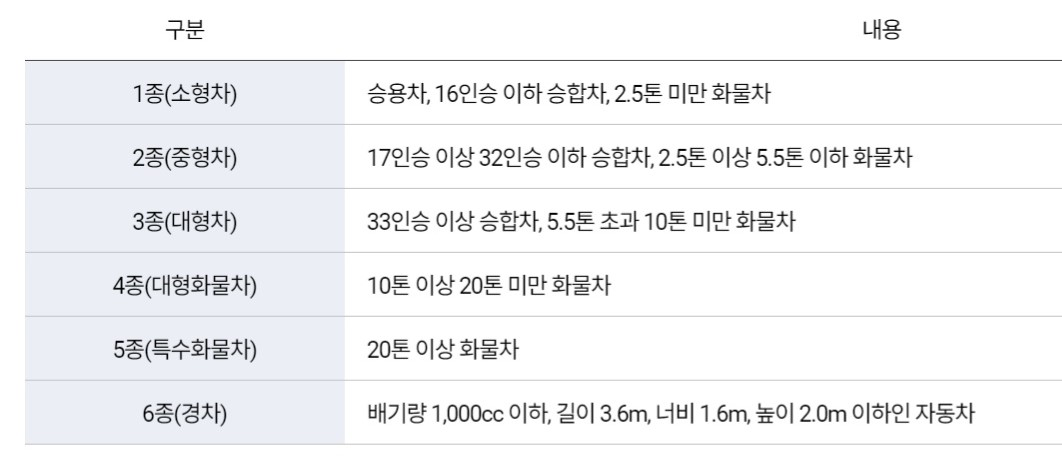

화물차는 휴게소 주이용대상이 아니므로 제외한다. (4,5종 제외)

6종은 무시하기로 한다. 

즉 데이터 코드 1~3까지만을 고려한다. 다만 1종, 2종, 3종의 탑승 인원에는 차이가 있을 것이므로 1종에 4인, 2종에 32인, 3종에 45인 탑승을 가정한다. 


* 고속버스는 전부 민간 업체라 열차처럼 50%만 예약을 받게 하면 정부가 그 손실을 물어줘야 하기에 반만 예약을 받게 하는 것이 실질적으로 불가능하다고 함. 9월 6일, 정부가 창가 좌석 우선 예매를 권고했으나 귀성길 버스는 대부분 만석이므로 창가좌석 '우선 예매 권고'는 사실상 의미가 없음. --> 따라서 2종과 3종 모두 최대 탑승 인원으로 가정. 

* 위 정보 출처: http://heraldk.com/2020/09/07/%EC%B6%94%EC%84%9D-%EA%B3%A0%EC%86%8D%EB%B2%84%EC%8A%A4-%EC%9D%B4%EC%9A%A9%EA%B0%9D-65%EB%A7%8C%EB%AA%85%EC%97%B4%EC%B0%A8%EB%8A%94-%EC%A0%88%EB%B0%98-%ED%83%91%EC%8A%B9/

In [46]:
입출구구분코드 = data_codedefinition['컬럼명 (DBMS)'] == '입출구구분코드'
입출구구분 = data_codedefinition[입출구구분코드]
입출구구분

,DB명,테이블명,컬럼명 (DBMS),데이터 코드,데이터 코드 의미
929,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,입출구구분코드,0,입구
930,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,입출구구분코드,1,출구


데이터 코드 0만 고려

In [47]:
TCS하이패스구분코드 = data_codedefinition['컬럼명 (DBMS)'] == 'TCS하이패스구분코드'
TCS하이패스구분 = data_codedefinition[TCS하이패스구분코드]
TCS하이패스구분 # 통행료 수납 시스템의 차이. TCS와 hi-pass 둘 다 고려하면 됨. 

,DB명,테이블명,컬럼명 (DBMS),데이터 코드,데이터 코드 의미
939,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS하이패스구분코드,1,TCS
940,한국도로공사,T_RLRL_영업소별입출구교통량_1시간,TCS하이패스구분코드,2,hi-pass


In [48]:
# 고려해야 할 영업소 코드

code_영업소 = [65,69,101,103,105,106,107,108,110,111,112,113,115,116,117,118,120,121,122,
123,125,126,129,130,131,132,133,135,137,138,139,140,229,518,528,529,722,733]

## 3-2. 설 전날 및 설 당일(2019.02.04 ~ 2019.02.05) 

'2019년 2월 고속도로 톨게이트 입출구 교통량 데이터(1시간 단위)' 에서 2월 4일과 2월 5일(설 당일) 데이터 가져오기

In [49]:
feb = pd.read_csv('C:/Users/jilon/Desktop/2019_02/REQ_DATA_NYW_2_UTF8.csv') # 2월 데이터

In [50]:
feb

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각,Unnamed: 8
0,20190201,3,275,0,6,2,1,2020.09.10 10:12:16,NaN
1,20190201,3,275,1,1,1,1,2020.09.10 10:12:16,NaN
2,20190201,3,275,1,1,2,8,2020.09.10 10:12:16,NaN
3,20190201,3,275,1,2,2,1,2020.09.10 10:12:16,NaN
4,20190201,3,275,1,4,1,3,2020.09.10 10:12:16,NaN
...,...,...,...,...,...,...,...,...,...
4347779,20190228,23,767,0,1,2,2,2020.09.10 10:12:16,NaN
4347780,20190228,23,599,0,1,2,7,2020.09.10 10:12:16,NaN
4347781,20190228,23,599,1,1,2,23,2020.09.10 10:12:16,NaN
4347782,20190228,23,758,0,1,2,1,2020.09.10 10:12:16,NaN


In [51]:
feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347784 entries, 0 to 4347783
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   집계일자         int64  
 1   집계시          int64  
 2   영업소코드        int64  
 3   입출구구분코드      int64  
 4   TCS차종구분코드    int64  
 5   TCS하이패스구분코드  int64  
 6   교통량          int64  
 7   최종변경시각       object 
 8   Unnamed: 8   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 298.5+ MB


In [52]:
feb['Unnamed: 8'].value_counts() # NaN 값만 있는지 확인 --> value count해봤을 때 아무 결과도 안 나옴(NaN값만 있음)

Series([], Name: Unnamed: 8, dtype: int64)

In [53]:
del feb['Unnamed: 8'] # NaN 값만 있는 마지막 열 삭제

In [54]:
feb

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각
0,20190201,3,275,0,6,2,1,2020.09.10 10:12:16
1,20190201,3,275,1,1,1,1,2020.09.10 10:12:16
2,20190201,3,275,1,1,2,8,2020.09.10 10:12:16
3,20190201,3,275,1,2,2,1,2020.09.10 10:12:16
4,20190201,3,275,1,4,1,3,2020.09.10 10:12:16
...,...,...,...,...,...,...,...,...
4347779,20190228,23,767,0,1,2,2,2020.09.10 10:12:16
4347780,20190228,23,599,0,1,2,7,2020.09.10 10:12:16
4347781,20190228,23,599,1,1,2,23,2020.09.10 10:12:16
4347782,20190228,23,758,0,1,2,1,2020.09.10 10:12:16


In [55]:
jeonnal1 = feb['집계일자'] == 20190204 # 집계일자 컬럼에서 값이 20190204인 데이터만 선택(2월 4일 데이터만 선택)
dangil1 = feb['집계일자'] == 20190205 

설_전날 = feb[jeonnal1] # 조건 만족하는 데이터 새로운 변수에 할당
설_당일 = feb[dangil1]

In [56]:
설_전날

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각
441829,20190204,0,101,0,1,1,686,2020.09.10 10:12:16
441830,20190204,0,101,0,1,2,2109,2020.09.10 10:12:16
441831,20190204,0,101,0,2,1,2,2020.09.10 10:12:16
441832,20190204,0,101,0,2,2,46,2020.09.10 10:12:16
441833,20190204,0,101,0,3,1,12,2020.09.10 10:12:16
...,...,...,...,...,...,...,...,...
557584,20190204,23,599,0,1,2,7,2020.09.10 10:12:16
557585,20190204,23,599,1,1,2,23,2020.09.10 10:12:16
557586,20190204,23,599,1,6,2,1,2020.09.10 10:12:16
557587,20190204,23,758,0,1,2,1,2020.09.10 10:12:16


In [98]:
# 설_전날 dataframe --> 입출구구분코드 0(입구), TCS차종구분코드 1~3(승용차)만 뽑아내기
TCS차종구분_123 = 설_전날[설_전날['TCS차종구분코드'].isin([1,2,3])]
차종123_입구 = TCS차종구분_123[TCS차종구분_123['입출구구분코드'].isin([0])]
차종123_입구

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각
441829,20190204,0,101,0,1,1,686,2020.09.10 10:12:16
441830,20190204,0,101,0,1,2,2109,2020.09.10 10:12:16
441831,20190204,0,101,0,2,1,2,2020.09.10 10:12:16
441832,20190204,0,101,0,2,2,46,2020.09.10 10:12:16
441833,20190204,0,101,0,3,1,12,2020.09.10 10:12:16
...,...,...,...,...,...,...,...,...
557577,20190204,23,615,0,2,2,1,2020.09.10 10:12:16
557579,20190204,23,674,0,1,1,20,2020.09.10 10:12:16
557582,20190204,23,767,0,1,2,1,2020.09.10 10:12:16
557584,20190204,23,599,0,1,2,7,2020.09.10 10:12:16


In [101]:
# 설 전날, 영업소코드 103만 먼저 보기
영업소_103 = 차종123_입구[차종123_입구['영업소코드'].isin([103])]

In [119]:
영업소_103_집계시별교통량평균 = 영업소_103.groupby(['집계시','TCS차종구분코드'], as_index = True).교통량.mean()
pd.DataFrame(영업소_103_집계시별교통량평균)
영업소_103_집계시별교통량평균.to_csv('영업소_103_집계시별교통량평균.csv',index=True)  
영업소_103_집계시별교통량평균 = pd.read_csv("C:/Users/jilon/영업소_103_집계시별교통량평균.csv")
영업소_103_집계시별교통량평균

,집계시,TCS차종구분코드,교통량
0,0,1,265.0
1,0,2,22.5
2,0,3,3.0
3,1,1,173.0
4,1,2,28.5
5,1,3,5.0
6,2,1,161.5
7,2,2,22.0
8,2,3,6.5
9,3,1,193.0


In [120]:
for i in range(len(영업소_103_집계시별교통량평균['교통량'])):
    
    if i%3 == 0: 
        영업소_103_집계시별교통량평균['교통량'][i] = 영업소_103_집계시별교통량평균['교통량'][i]*4 
        
    elif i%3 == 1:
        영업소_103_집계시별교통량평균['교통량'][i] = 영업소_103_집계시별교통량평균['교통량'][i]*35
    
    else:
        영업소_103_집계시별교통량평균['교통량'][i] = 영업소_103_집계시별교통량평균['교통량'][i]*45  

C:\Users\jilon\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jilon\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jilon\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load st

In [123]:
영업소_103_집계시별교통량평균 = 영업소_103_집계시별교통량평균.rename(columns={'교통량': '예상인원'})
영업소_103_집계시별교통량평균

,집계시,TCS차종구분코드,예상인원
0,0,1,1060.0
1,0,2,787.5
2,0,3,135.0
3,1,1,692.0
4,1,2,997.5
5,1,3,225.0
6,2,1,646.0
7,2,2,770.0
8,2,3,292.5
9,3,1,772.0


In [127]:
영업소_103_집계시별교통량평균_fin = pd.DataFrame(영업소_103_집계시별교통량평균.groupby(['집계시'], as_index = True).예상인원.sum())
영업소_103_집계시별교통량평균_fin
영업소_103_집계시별교통량평균_fin.to_csv('영업소_103_집계시별교통량평균_fin.csv',index=True)  
영업소_103_집계시별교통량평균_fin = pd.read_csv("C:/Users/jilon/영업소_103_집계시별교통량평균_fin.csv")
영업소_103_집계시별교통량평균_fin

,집계시,예상인원
0,0,1982.5
1,1,1914.5
2,2,1708.5
3,3,1857.0
4,4,3043.0
5,5,3878.0
6,6,4689.5
7,7,5148.0
8,8,5518.0
9,9,7076.0


Text(0.5, 1.0, '설 전날 시간별 영업소 통과 예상인원수 그래프_영업소103')

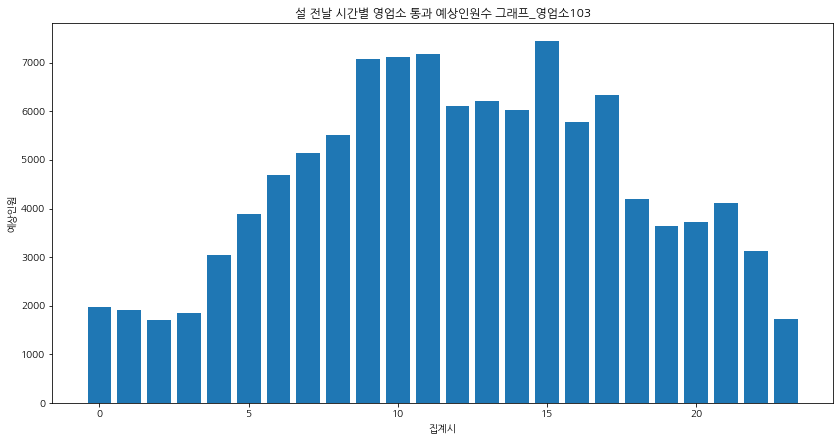

In [129]:
# 설 전날 시간별 영업소 통과 예상인원수 그래프(영업소 코드 103을 예로 들었음)


plt.figure(figsize=(14,7))
plt.xlabel('집계시')
plt.ylabel('예상인원')
plt.bar(영업소_103_집계시별교통량평균_fin['집계시'],영업소_103_집계시별교통량평균_fin['예상인원'])
plt.title('설 전날 시간별 영업소 통과 예상인원수 그래프_영업소103')

설 전날 시간별 영업소 통과 예상인원수 그래프는 위와 같다. (영업소 코드 103번, 즉 도로교통공단 수원신갈 영업소 기준 15시에 시간별 영업소 통과 예상인원수가 가장 많은 것으로 나타났다.)
___

같은 방식으로 휴게소 직전에 있는 모든 영업소들(아래와 같음)

103(수원신갈), 106(오산), 229(북천안), 116(옥천), 733(옥산), 112(남청주), 116(옥천), 117(금강), 118(영동), 120(황간), 122(김천), 125(남구미), 131(경산), 133(건천), 135(경주), 722(활천), 137(통도사)

에 대해 시간별 영업소 통과 예상인원수를 plotting해본다. 설 전날, 설 당일에 대해 각각 plotting해야 하므로 영업소별로 2개의 그래프가 생성될 것이다. 
___

시간대별로 영업소 통과 인원 수가 가장 많은 것으로 나타나는 영업소 상위 5개를 뽑는다. 그리고 그 영업소 통과 직후 가장 먼저 나타나는 휴게소의 밀집도가 가장 높을 것이라고 보고, 휴게소 근방 졸음쉼터를 명절 기간 동안 임시 Drive-thru 휴게소로 지정하여 운영할 것이다. 

In [143]:
설_당일

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각
557589,20190205,0,101,0,1,1,333,2020.09.10 10:12:16
557590,20190205,0,101,0,1,2,856,2020.09.10 10:12:16
557591,20190205,0,101,0,2,2,4,2020.09.10 10:12:16
557592,20190205,0,101,0,3,2,78,2020.09.10 10:12:16
557593,20190205,0,101,0,4,1,1,2020.09.10 10:12:16
...,...,...,...,...,...,...,...,...
655586,20190205,23,599,0,1,2,31,2020.09.10 10:12:16
655587,20190205,23,599,0,6,2,1,2020.09.10 10:12:16
655588,20190205,23,599,1,1,2,20,2020.09.10 10:12:16
655589,20190205,23,599,1,6,2,1,2020.09.10 10:12:16


앞서 언급한 바와 같이 설 당일 데이터도 같은 방식으로 처리한다. (코드 동일하므로 이후 생략)

## 3-3. 추석 전날 및 추석 당일(2019.09.12 ~ 2019.09.13)
'2019년 9월 고속도로 톨게이트 입출구 교통량 데이터(1시간 단위)' 에서 9월 12일과 9월 13일(추석 당일) 데이터 가져오기

In [130]:
sept = pd.read_csv('C:/Users/jilon/Desktop/2019_09/REQ_DATA_NYW_9_UTF8.csv') # 9월 데이터

In [131]:
sept

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각,Unnamed: 8
0,20190901,0,101,0,1,1,437,2019.09.01 02:08:11,NaN
1,20190901,0,101,0,1,2,1620,2019.09.01 02:08:11,NaN
2,20190901,0,101,0,2,1,1,2019.09.01 02:08:11,NaN
3,20190901,0,101,0,2,2,30,2019.09.01 02:08:11,NaN
4,20190901,0,101,0,3,1,1,2019.09.01 02:08:11,NaN
...,...,...,...,...,...,...,...,...,...
5047221,20190930,23,876,0,6,2,4,2019.10.01 01:07:30,NaN
5047222,20190930,23,876,1,1,2,9,2019.10.01 01:07:30,NaN
5047223,20190930,23,876,1,4,1,2,2019.10.01 01:07:30,NaN
5047224,20190930,23,876,1,6,1,2,2019.10.01 01:07:30,NaN


In [132]:
sept['Unnamed: 8'].value_counts() 

Series([], Name: Unnamed: 8, dtype: int64)

In [133]:
del sept['Unnamed: 8'] # NaN 값만 있는 마지막 열 삭제

In [134]:
jeonnal2 = sept['집계일자'] == 20190912 # 집계일자 컬럼에서 값이 20190204인 데이터만 선택(2월 4일 데이터만 선택)
dangil2 = sept['집계일자'] == 20190913 

추석_전날 = sept[jeonnal2] # 조건 만족하는 데이터 새로운 변수에 할당
추석_당일 = sept[dangil2]

In [137]:
추석_전날

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각
1927283,20190912,0,101,0,1,1,1020,2019.09.12 02:22:17
1927284,20190912,0,101,0,1,2,4037,2019.09.12 02:22:17
1927285,20190912,0,101,0,2,1,6,2019.09.12 02:22:17
1927286,20190912,0,101,0,2,2,48,2019.09.12 02:22:17
1927287,20190912,0,101,0,3,1,5,2019.09.12 02:22:17
...,...,...,...,...,...,...,...,...
2064202,20190912,23,876,0,1,1,1,2019.09.13 01:22:32
2064203,20190912,23,876,0,1,2,18,2019.09.13 01:22:32
2064204,20190912,23,876,1,1,1,4,2019.09.13 01:22:32
2064205,20190912,23,876,1,1,2,17,2019.09.13 01:22:32


In [138]:
# value counting (by column)

print(추석_전날['집계시'].value_counts(),'\n')
print(추석_전날['영업소코드'].value_counts(),'\n')
print(추석_전날['입출구구분코드'].value_counts(),'\n')
print(추석_전날['TCS차종구분코드'].value_counts(),'\n')
print(추석_전날['TCS하이패스구분코드'].value_counts(),'\n')

8     7080
9     7058
10    6919
7     6906
11    6701
12    6541
13    6438
14    6298
15    6101
16    5974
5     5922
17    5725
0     5534
18    5473
4     5460
1     5245
19    5220
2     5160
3     5133
20    5011
21    4694
22    4322
6     4031
23    3978
Name: 집계시, dtype: int64 

11     537
252    528
62     526
67     524
68     519
685    518
254    518
253    516
190    514
101    510
127    500
61     493
53     490
103    486
131    486
173    483
64     482
542    477
643    474
106    474
140    473
641    471
29     470
244    467
255    466
520    462
129    459
108    456
175    456
621    454
528    450
251    450
543    450
684    448
519    448
509    447
167    446
602    443
622    442
65     442
138    441
629    440
172    440
176    439
135    438
651    438
245    435
250    435
194    434
177    432
125    426
113    425
102    424
150    422
126    421
540    421
298    420
123    420
287    418
289    417
608    416
544    415
553    411
555    411
229   

In [139]:
추석_전날_집계시별_교통량평균 = 추석_전날.groupby(['집계시'], as_index=False).mean()
추석_전날_집계시별_교통량평균 = 추석_전날_집계시별_교통량평균[['집계시','교통량']]  
추석_전날_집계시별_교통량평균

,집계시,교통량
0,0,46.689375
1,1,37.419447
2,2,31.729457
3,3,32.180986
4,4,36.039011
5,5,43.449173
6,6,69.180848
7,7,59.247032
8,8,70.244774
9,9,85.686597


In [140]:
추석_전날_집계시별_교통량평균['교통량']

0      46.689375
1      37.419447
2      31.729457
3      32.180986
4      36.039011
5      43.449173
6      69.180848
7      59.247032
8      70.244774
9      85.686597
10     99.711519
11    109.566035
12    108.231310
13    105.521746
14    105.891077
15    105.917554
16    102.014228
17     97.510917
18     84.845971
19     72.222797
20     65.158851
21     58.608436
22     47.246414
23     33.738813
Name: 교통량, dtype: float64

Text(0.5, 1.0, '추석 전날 시간별 평균교통량 그래프')

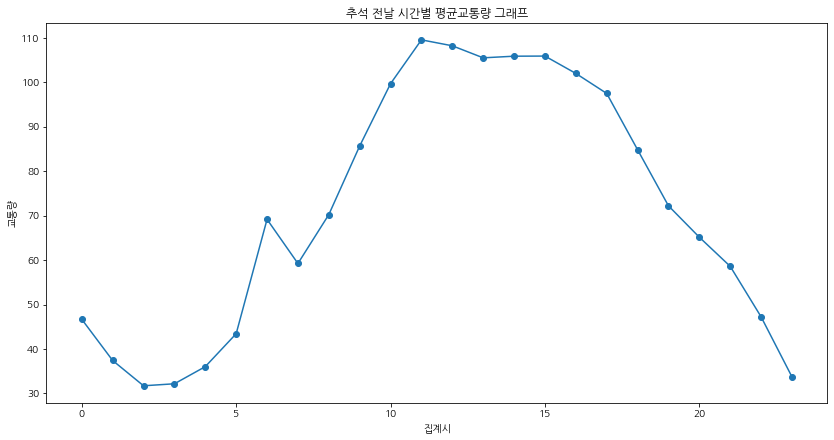

In [141]:
# 추석 전날 시간별 평균교통량 확인

plt.figure(figsize=(14,7))
plt.xlabel('집계시')
plt.ylabel('교통량')
plt.plot(추석_전날_집계시별_교통량평균['집계시'],추석_전날_집계시별_교통량평균['교통량'],marker='o')
plt.title('추석 전날 시간별 평균교통량 그래프')

위 그래프는 다른 것은 고려하지 않고 집계시와 교통량을 가지고 plotting 해본 결과이다. 

In [142]:
추석_당일

,집계일자,집계시,영업소코드,입출구구분코드,TCS차종구분코드,TCS하이패스구분코드,교통량,최종변경시각
2064207,20190913,0,101,0,1,1,297,2019.09.13 02:22:01
2064208,20190913,0,101,0,1,2,1203,2019.09.13 02:22:01
2064209,20190913,0,101,0,2,1,2,2019.09.13 02:22:01
2064210,20190913,0,101,0,2,2,14,2019.09.13 02:22:01
2064211,20190913,0,101,0,3,1,1,2019.09.13 02:22:01
...,...,...,...,...,...,...,...,...
2170967,20190913,23,876,1,1,1,62,2019.09.14 01:22:26
2170968,20190913,23,876,1,1,2,293,2019.09.14 01:22:26
2170969,20190913,23,876,1,3,2,1,2019.09.14 01:22:26
2170970,20190913,23,876,1,6,1,7,2019.09.14 01:22:26


추석도 설 전날 영업소 코드 103을 예로 든 것과 같은 방식으로 인사이트를 얻도록 한다. (코드는 동일하므로 이후는 생략하도록 한다.)